<a href="https://colab.research.google.com/github/EnyaOliveira/ponderada_mod09_sem07/blob/main/ponderada_sem07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
import os
import cv2
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para o dataset
dataset_path = '/content/drive/MyDrive/Modulo_09/Programacao/Semana_07/imagens_pose/images/images'
anotations_path = '/content/drive/MyDrive/Modulo_09/Programacao/Semana_07/imagens_pose/keypoints.json'

In [ ]:
# Carregar o arquivo JSON (substitua o caminho correto)
with open('/content/drive/MyDrive/Modulo_09/Programacao/Semana_07/imagens_pose/keypoints.json', 'r') as file:
    data = json.load(file)

# Verificar a estrutura do arquivo
data.keys()  # Para visualizar as chaves principais no JSON

dict_keys(['images', 'annotations', 'categories', 'info'])

In [ ]:
# Os dados de imagens estão no campo 'images'
images_dict = data['images']

# Convertendo o dicionário para um DataFrame para facilitar a manipulação
df_images = pd.DataFrame(list(images_dict.items()), columns=['id', 'filename'])

# Exibir as primeiras linhas para verificar
df_images.head()

,id,filename
0,1,2007_000063.jpg
1,2,2007_000175.jpg
2,3,2007_000332.jpg
3,4,2007_000392.jpg
4,5,2007_000464.jpg


In [ ]:
# Supondo que o dataset tenha um campo que identifique bovinos, filtramos por ele
# Caso contrário, consideramos todas as imagens para o processamento

# Filtrar imagens de bovinos (Ajuste conforme necessário, se houver uma coluna específica para identificar bovinos)
# df_bovinos = df_images[df_images['categoria'] == 'bovino']  # Exemplo se houver categoria

# Se todas as imagens são de bovinos:
df_bovinos = df_images  # Aqui, mantemos todas as imagens
print(f"Total de imagens de bovinos: {len(df_bovinos)}")


Total de imagens de bovinos: 4608


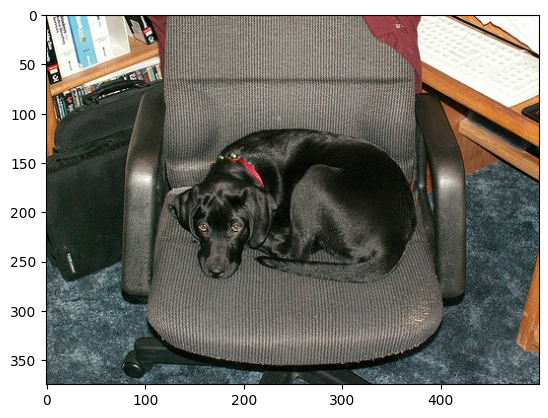

In [ ]:
import cv2

# Função para carregar imagens do diretório especificado
def load_images(image_filenames, image_dir):
    images = []
    for filename in image_filenames:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Substitua pelo caminho onde as imagens estão armazenadas
image_dir = '/content/drive/MyDrive/Modulo_09/Programacao/Semana_07/imagens_pose/images/images'

# Carregar as imagens de bovinos
bovino_images = load_images(df_bovinos['filename'], image_dir)

# Exibir a primeira imagem carregada como exemplo
if bovino_images:
    plt.imshow(cv2.cvtColor(bovino_images[4], cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
# Função de pré-processamento (redimensionamento e normalização)
def preprocess_images(images, target_size=(224, 224)):
    processed_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        normalized_img = resized_img / 255.0  # Normalizar entre 0 e 1
        processed_images.append(normalized_img)
    return np.array(processed_images)

# Pré-processar as imagens de bovinos
processed_bovino_images = preprocess_images(bovino_images)


In [ ]:
# Verificar se as imagens de bovinos foram carregadas corretamente
print(f"Total de imagens carregadas: {len(bovino_images)}")

# Exibir uma imagem para garantir que as imagens foram carregadas corretamente
if len(bovino_images) > 0:
    plt.imshow(cv2.cvtColor(bovino_images[0], cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Nenhuma imagem foi carregada. Verifique o caminho do diretório ou os arquivos.")


In [ ]:
import tensorflow_hub as hub

# Carregar o modelo MoveNet da TensorFlow Hub (versão single pose)
model = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")

# Definir a função para fazer a predição de pose
def movenet_inference(image):
    # A entrada do modelo precisa estar com forma (1, altura, largura, canais)
    image = tf.image.resize_with_pad(image, target_height=256, target_width=256)
    input_image = tf.cast(tf.expand_dims(image, axis=0), dtype=tf.int32)

    # Predição de pose
    outputs = model.signatures['serving_default'](input_image)
    keypoints = outputs['output_0']
    return keypoints

# Aplicar o modelo em uma imagem
pred_keypoints = movenet_inference(processed_bovino_images[0])

# Visualizar os pontos preditos
print(pred_keypoints)
